### Baseline Model

INTRODUCTION: This notebooks is for the creation of our baseline model. Before our modelling we will do a Train Test Split and we also scale our dataset by applying a Standard Scaler. Then we are going to train our dataset on 2 differents model, the first model is a linear regression (the model predict the target variable base on its other features) and the seconde model is a decision tree regressor (the model is predicting base on questions).

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


In [4]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

The train test split is a machine learning practice commonly use to evaluate the performance of a model. The goal is to split the dataset into 2 part, the first part is the training then the other is the testing. The trained will be used to train the model while the test part will be used evaluate the model and see if it is predictive. The split made is 80% for the train and 20% for the test. 

In [5]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [6]:
X.shape

(9663, 29)

In [7]:
y.shape

(9663,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

### Scaling the dataset

Scaling a data is the action of normalize or put on the same the level a dataset, it is important to do it our data is not uniforme or contain very different numbers. 
We are using the standard scaler which will transform the dataset where each features will have a means of 0 and a standard deviation of 1.

In [9]:
lr_scaler = StandardScaler()
X_train_s = lr_scaler.fit_transform(X_train)
X_test_s = lr_scaler.transform(X_test)

### Linear Regression Model

In [10]:
lr_model = LinearRegression() 
lr_model.fit(X_train_s, y_train)
lr_model.score(X_train_s, y_train)

0.06634019787289747

In [11]:
lr_model.score(X_test_s, y_test)

-2045132947542293.5

We can see that the score are very small showing that the model does not fit the database. 

### Correlation of our columns

In [12]:
X_train_col = X_train.columns
X_train_col

Index(['Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Category_Arcade', 'Category_Books & Reference',
       'Category_Business', 'Category_Casual', 'Category_Communication',
       'Category_Education', 'Category_Entertainment', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_Lifestyle', 'Category_Music & Audio',
       'Category_Personalization', 'Category_Productivity', 'Category_Puzzle',
       'Category_Shopping', 'Category_Social', 'Category_Sports',
       'Category_Tools', 'Category_Travel & Local', 'Category_other',
       'Content_Rating_Everyone', 'Content_Rating_Not for Everyone'],
      dtype='object')

In [13]:
coef_col = lr_model.coef_


In [14]:
coef_col

array([ 7.12675482e-02, -7.08786356e-02, -3.48235052e-02,  2.44840078e-01,
        2.67179546e-01,  4.18806743e+09, -2.33864028e+12, -3.35947778e+12,
       -3.70769532e+12, -2.24242059e+12, -2.18920772e+12, -4.74194042e+12,
       -3.72221460e+12, -2.41258763e+12, -2.69669364e+12, -2.75478351e+12,
       -3.35535172e+12, -4.06972956e+12, -2.92601373e+12, -2.74432624e+12,
       -2.30705614e+12, -2.70736138e+12, -2.27498980e+12, -2.16888605e+12,
       -3.73305581e+12, -2.59843836e+12, -5.94153148e+12, -4.18409865e+12,
       -4.18409865e+12])

In [15]:
pd.DataFrame(coef_col,X_train_col)

,0
Rating Count,7.126755e-02
Free,-7.087864e-02
Price,-3.482351e-02
Ad Supported,2.448401e-01
In App Purchases,2.671795e-01
Editors Choice,4.188067e+09
Category_Arcade,-2.338640e+12
Category_Books & Reference,-3.359478e+12
Category_Business,-3.707695e+12
Category_Casual,-2.242421e+12


We can see that only that only few of our columns are correlated to our target variable Rating. 
There is Rating counts, Ad Supported, In app purchases and Editors choices. 

### Decision Tree Regressor Model

In [16]:
DTR_model = DecisionTreeRegressor(random_state = 1234, max_depth = 3)
DTR_model.fit(X_train_s, y_train)
DTR_model.score(X_train_s, y_train)

0.9439536186586199

In [17]:
DTR_model.score(X_test_s, y_test)

0.9471222271304011

We can see that this model is well fitted. 
We can plot the Decision Tree and see that different decision that the model has made. 

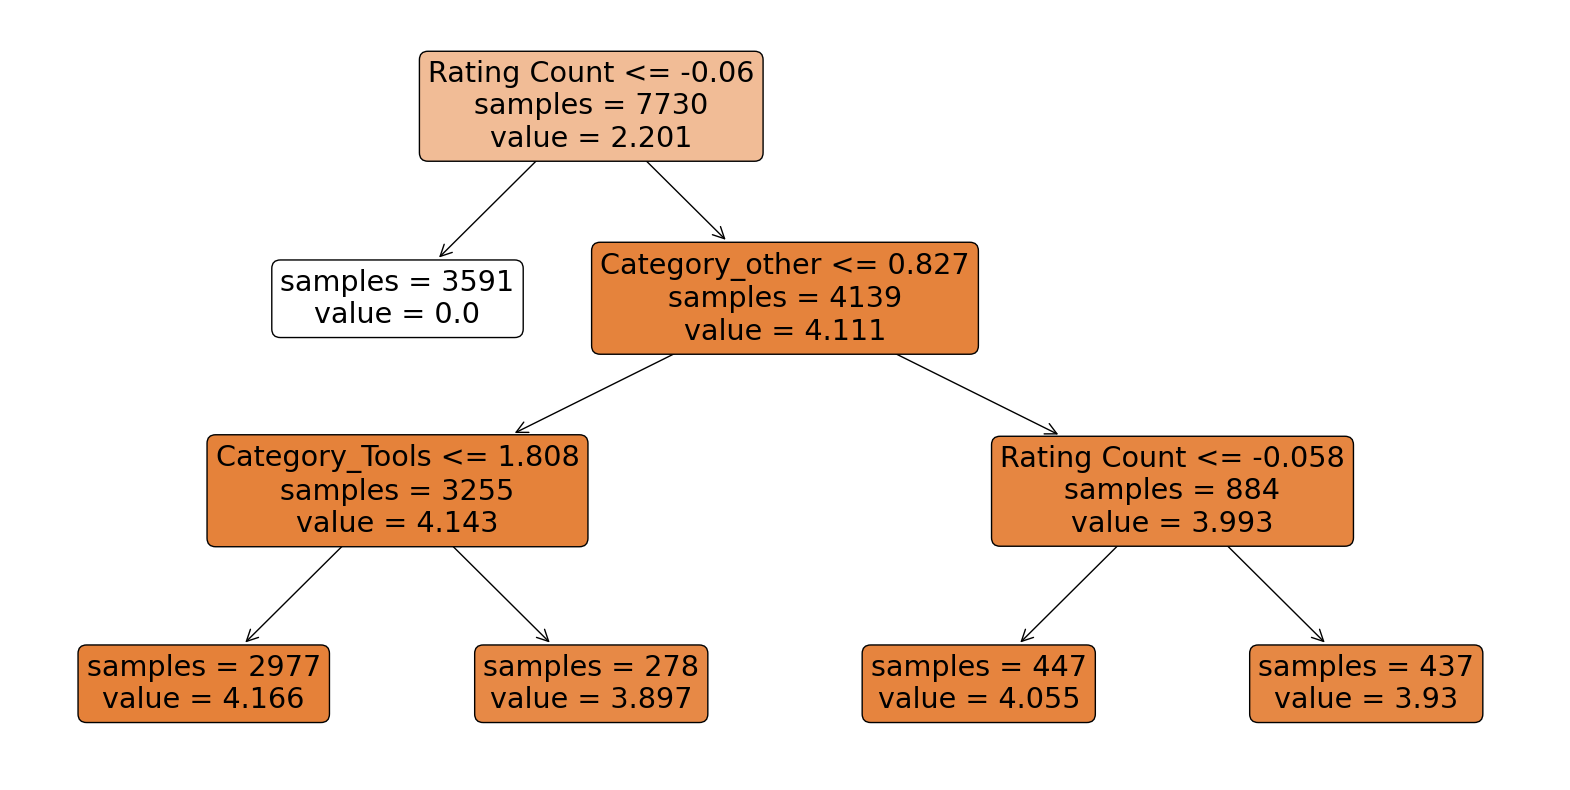

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))  
plot_tree(DTR_model,
            feature_names = list(X.columns),
            rounded = True,
            impurity = False,
            filled = True)
plt.savefig('decision_tree_plot.png')
plt.show()


A decision tree is a model that will make the best decision based on the features and will predict an outcome, in our situation it will predict the Rating. This tree represent the decision that the model made and we can see that the predictive feature is Rating Count, Category_other, Category_Tools and Rating Count. At the end of the each node represent the predicive Rating for the applications. 

CONCLUSION:  We can see that between our 2 models the Decision Tree Regressor is the best fit for our dataset with 94% of being predictive. While our Linera regression model score is very low also in the negative. We are now going to tuned our model with hyperparameters. 